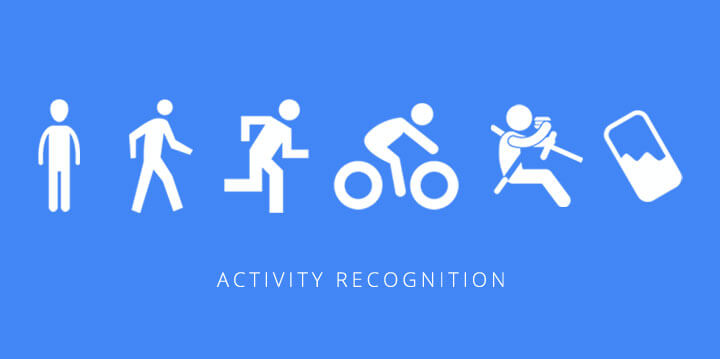

In [1]:
from IPython.core.display import Image, display
display(Image('https://www.androidhive.info/wp-content/uploads/2017/12/android-user-activity-recognition-still-walking-running-driving.jpg', width=600))

In [2]:
from sklearn.tree import DecisionTreeClassifier
from collections import Counter
from sklearn.metrics import accuracy_score
from sklearn.tree import export_graphviz
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn; seaborn.set()
import numpy as np
from sklearn import metrics

## Analyse avec dataset brut

In [3]:
# récupération de variables qui ont été stockées dans le noteBook "Pré-traitement" (DATASET BRUT)
%store -r activity_dataset_full
%store -r colonnes_source
%store -r colonnes_cible
%store -r source
%store -r cible

In [4]:
# afficher dataset
activity_dataset_full.head(None)

,Action,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,t14,t15,t16,t17,t18,t19,t20,Lieux_Ecole,Lieux_Exterieur,Lieux_Maison
0,Se lever (chaise),0.635193,0.562164,0.283249,0.328735,0.045013,-1.713516,-2.079834,-0.962936,-2.556274,...,8.747101,9.652100,9.859192,10.802505,13.584579,12.082214,14.362686,0,0,1
1,S'assoir (chaise),-0.049545,0.103683,0.085724,-0.032791,0.163528,0.037842,0.217407,0.337112,0.559769,...,15.057007,14.237000,14.550629,14.302826,17.004684,14.766113,14.721832,0,0,1
2,Se lever (chaise),0.297607,-0.080673,0.219788,0.309570,0.875809,1.343872,1.078110,1.118820,0.959610,...,12.562241,13.444504,14.579376,14.591339,13.250595,13.529510,13.901810,0,0,1
3,S'assoir (chaise),0.073746,-0.011246,-0.050751,0.015091,-0.114197,0.004318,-0.012436,-0.044769,0.356262,...,14.497955,14.603302,13.281708,13.818008,13.615707,12.161224,12.683167,0,0,1
4,S'assoir (chaise),-0.215942,-0.227921,0.054596,0.242538,-0.502060,-0.815704,0.562164,-0.844421,-0.509247,...,11.858353,11.490845,12.709488,11.627335,16.178680,15.608887,13.404999,0,0,1
5,Se lever (chaise),0.656738,0.335907,0.605255,0.568146,0.474777,0.628006,0.953613,1.128387,1.390564,...,10.050735,10.024414,11.799683,12.848358,14.452469,14.219040,13.470856,0,0,1
6,S'assoir (chaise),0.250916,0.150360,0.199448,0.224579,0.292816,0.116852,0.067764,-0.024414,-0.112991,...,17.112427,15.128830,13.330780,14.136429,14.870270,12.547897,12.288101,0,0,1
7,Se lever (chaise),0.563370,0.684265,0.241348,0.832718,0.422104,0.766876,0.699829,0.875809,0.960800,...,11.926590,8.392746,8.573502,10.373947,13.592957,14.381851,14.163971,0,0,1
8,S'assoir (chaise),0.446045,0.211411,0.108459,-0.189621,-0.077087,0.341904,-0.041168,-0.728302,-0.229111,...,12.910599,10.436203,12.107361,13.580978,14.277695,14.428528,13.863510,0,0,1
9,Se lever (chaise),1.092484,-0.044769,0.268875,0.119232,-0.099838,-0.332062,0.110855,0.428085,0.504700,...,14.002365,14.732605,14.667953,13.225449,14.119690,14.590134,14.975616,0,0,1


In [5]:
# afficher les nombres d'exemple dans chaque classe 
count = Counter(activity_dataset_full.Action)
count

Counter({'Courrir': 60,
         'Marcher': 57,
         'Ne rien faire': 57,
         "S'allonger (depuis position assise)": 59,
         "S'allonger (depuis position debout)": 56,
         "S'assoir (chaise)": 52,
         "S'assoir (depuis position allongée)": 66,
         'Sauter': 56,
         'Se lever (chaise)': 51,
         'Se lever (depuis position allongée)': 51})

### Split data

In [6]:

x_train, x_test, y_train, y_test = train_test_split(source, cible, test_size=0.7)

display(x_train, y_train, x_test, y_test)


,t1,t2,t3,t4,t5,t6,t7,t8,t9,t10,...,t14,t15,t16,t17,t18,t19,t20,Lieux_Ecole,Lieux_Exterieur,Lieux_Maison
416,13.626480,13.590561,12.547882,10.329666,12.065460,12.083420,11.859558,11.646469,9.699982,7.870804,...,17.952789,5.268311,13.971237,8.823700,9.640121,9.945389,9.237915,0,0,1
333,14.082565,14.106506,13.920944,13.980804,13.918564,13.660004,13.788086,13.972427,13.943710,13.723450,...,14.019119,13.991577,13.929337,13.964050,13.959259,13.923355,13.816803,0,0,1
157,-10.703400,-18.849686,-13.138306,-15.673767,-10.595673,-12.121979,-12.581650,-12.440399,-15.423569,-20.417877,...,-0.402344,1.016205,2.236069,-7.786072,-13.046143,-16.168167,-10.969162,1,0,0
407,13.454086,14.053848,14.497971,12.965683,11.006027,10.905457,9.528809,6.504929,4.538086,2.117554,...,-8.053024,-3.363983,-8.785645,-11.152328,-7.143234,-8.810776,-8.825150,0,0,1
47,11.143692,12.432953,12.812439,12.565842,10.089035,10.426605,13.950882,13.523514,17.165100,16.688660,...,11.736267,12.358734,15.550217,15.529861,14.483612,14.436890,14.567383,0,0,1
540,14.538666,15.261719,14.766113,13.901810,12.492828,12.580215,11.763794,8.474167,3.464279,-6.885849,...,-8.725784,-7.072601,-9.716980,-7.850708,-7.719025,-6.549469,-6.666779,0,0,1
511,13.740204,12.206696,6.009323,1.299927,4.660187,10.960541,20.941971,61.827744,15.830338,-2.264435,...,-1.418701,3.649231,34.847504,36.550369,24.906158,9.730515,6.870041,0,0,1
534,14.937302,12.247406,9.840042,9.531189,11.304092,14.627243,15.608856,13.393051,16.407333,15.472412,...,-10.378998,-25.316422,-17.536453,-15.861725,-10.062943,-9.167526,-9.846298,0,0,1
428,-10.559738,-9.863037,-9.303986,-8.989166,-7.820786,-10.923676,-11.608398,-15.313446,-8.699463,-3.624954,...,7.688843,12.048691,11.876312,13.579788,14.629639,14.457260,14.320786,0,0,1
490,13.054260,12.057083,12.929749,12.110947,12.352768,11.690750,15.981171,12.300064,11.743423,16.881393,...,11.675201,10.992844,11.138901,11.407043,10.713943,10.406281,12.617310,0,0,1


,Action
416,S'allonger (depuis position assise)
333,Ne rien faire
157,Marcher
407,S'allonger (depuis position assise)
47,S'assoir (depuis position allongée)
540,S'allonger (depuis position assise)
511,Sauter
534,S'allonger (depuis position debout)
428,S'assoir (depuis position allongée)
490,S'assoir (depuis position allongée)


,t1,t2,t3,t4,t5,t6,t7,t8,t9,t10,...,t14,t15,t16,t17,t18,t19,t20,Lieux_Ecole,Lieux_Exterieur,Lieux_Maison
37,9.489288,9.995682,13.967651,15.065384,9.319305,8.305359,6.488159,11.184387,9.024811,13.870697,...,16.386993,24.250748,31.991196,18.359818,9.472549,8.592667,8.285019,0,0,1
73,12.571823,14.350723,12.801666,11.215500,11.360352,11.313675,12.082214,13.898209,15.335922,12.474854,...,13.458878,12.891464,11.387894,10.910248,12.555069,12.760971,14.592529,0,0,1
535,12.901031,12.556274,11.775772,10.579849,9.195999,9.805313,11.357971,13.451691,18.758438,14.709854,...,2.025360,11.377136,7.279434,9.869965,10.791733,8.639359,10.895889,0,0,1
505,13.923340,14.165146,14.100525,13.484009,13.858704,15.812378,17.501495,17.599655,17.180664,16.394165,...,11.549500,12.043915,11.849976,13.037506,14.511124,13.598938,13.837173,0,0,1
18,14.489578,14.563812,14.080185,14.055038,13.651596,13.115311,11.093414,8.860809,8.493301,14.523102,...,14.031097,14.289658,13.689911,15.447266,14.679932,13.846741,13.804840,0,0,1
239,11.820053,15.116852,15.217422,16.918503,18.040192,18.156296,15.311996,11.142487,9.974121,11.711121,...,13.536682,13.276917,13.977219,14.003555,13.807220,13.844345,13.904205,0,0,1
446,-10.588486,-11.136765,-11.152313,-10.856628,-11.537781,-11.967545,-13.441177,-10.220978,-7.074982,-4.995621,...,3.737228,8.116226,11.059891,14.964828,16.512695,16.392960,13.818008,0,0,1
363,13.062653,13.038696,13.017136,13.664780,14.075394,12.691544,16.400146,18.751266,12.636459,17.215393,...,16.451645,14.520706,18.198196,11.441757,8.651306,8.404724,11.154449,0,0,1
285,13.935318,13.221848,12.337204,11.793701,10.280579,8.520828,10.858780,14.520706,15.525085,13.013565,...,8.522034,15.909348,10.488876,5.619049,4.213669,3.892853,8.584274,0,0,1
366,9.246277,10.044754,8.381958,11.563858,9.325287,14.208267,14.781677,3.849731,8.909912,16.108063,...,12.713089,14.174728,14.362701,17.332687,19.582062,16.755692,8.239502,0,0,1


,Action
37,Se lever (depuis position allongée)
73,Marcher
535,S'allonger (depuis position debout)
505,Se lever (chaise)
18,S'assoir (chaise)
239,Se lever (chaise)
446,Se lever (depuis position allongée)
363,Se lever (depuis position allongée)
285,S'allonger (depuis position debout)
366,Se lever (depuis position allongée)


In [7]:
# DecisionTreeClassifier

clf = DecisionTreeClassifier().fit(x_train, y_train)

predict = clf.predict(x_test)


### Report

In [8]:
print(metrics.classification_report(y_test,predict))

                                     precision    recall  f1-score   support

                            Courrir       0.52      0.36      0.43        44
                            Marcher       0.48      0.33      0.39        43
                      Ne rien faire       0.56      0.87      0.68        39
S'allonger (depuis position assise)       0.54      0.70      0.61        37
S'allonger (depuis position debout)       0.55      0.46      0.50        39
                  S'assoir (chaise)       0.36      0.37      0.36        38
S'assoir (depuis position allongée)       0.50      0.56      0.53        41
                             Sauter       0.63      0.42      0.51        40
                  Se lever (chaise)       0.44      0.44      0.44        39
Se lever (depuis position allongée)       0.40      0.47      0.43        36

                        avg / total       0.50      0.49      0.49       396



### Accuracy

In [9]:
res=[]

for i in range(100):
    x_train, x_test, y_train, y_test = train_test_split(source, cible, test_size=.7)
    clf = DecisionTreeClassifier().fit(x_train, y_train)
    y_predict = clf.predict(x_test)
    res.append(accuracy_score(y_test, y_predict))
    
print('Average : ',np.average(res))

Average :  0.50803030303


### Graphe

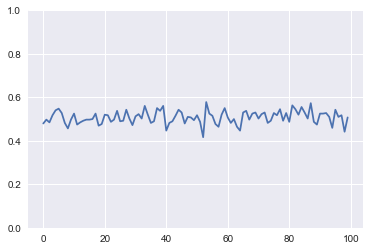

In [10]:
%matplotlib inline

plt.ylim([0,1])
plt.plot(res);

### Decision tree image

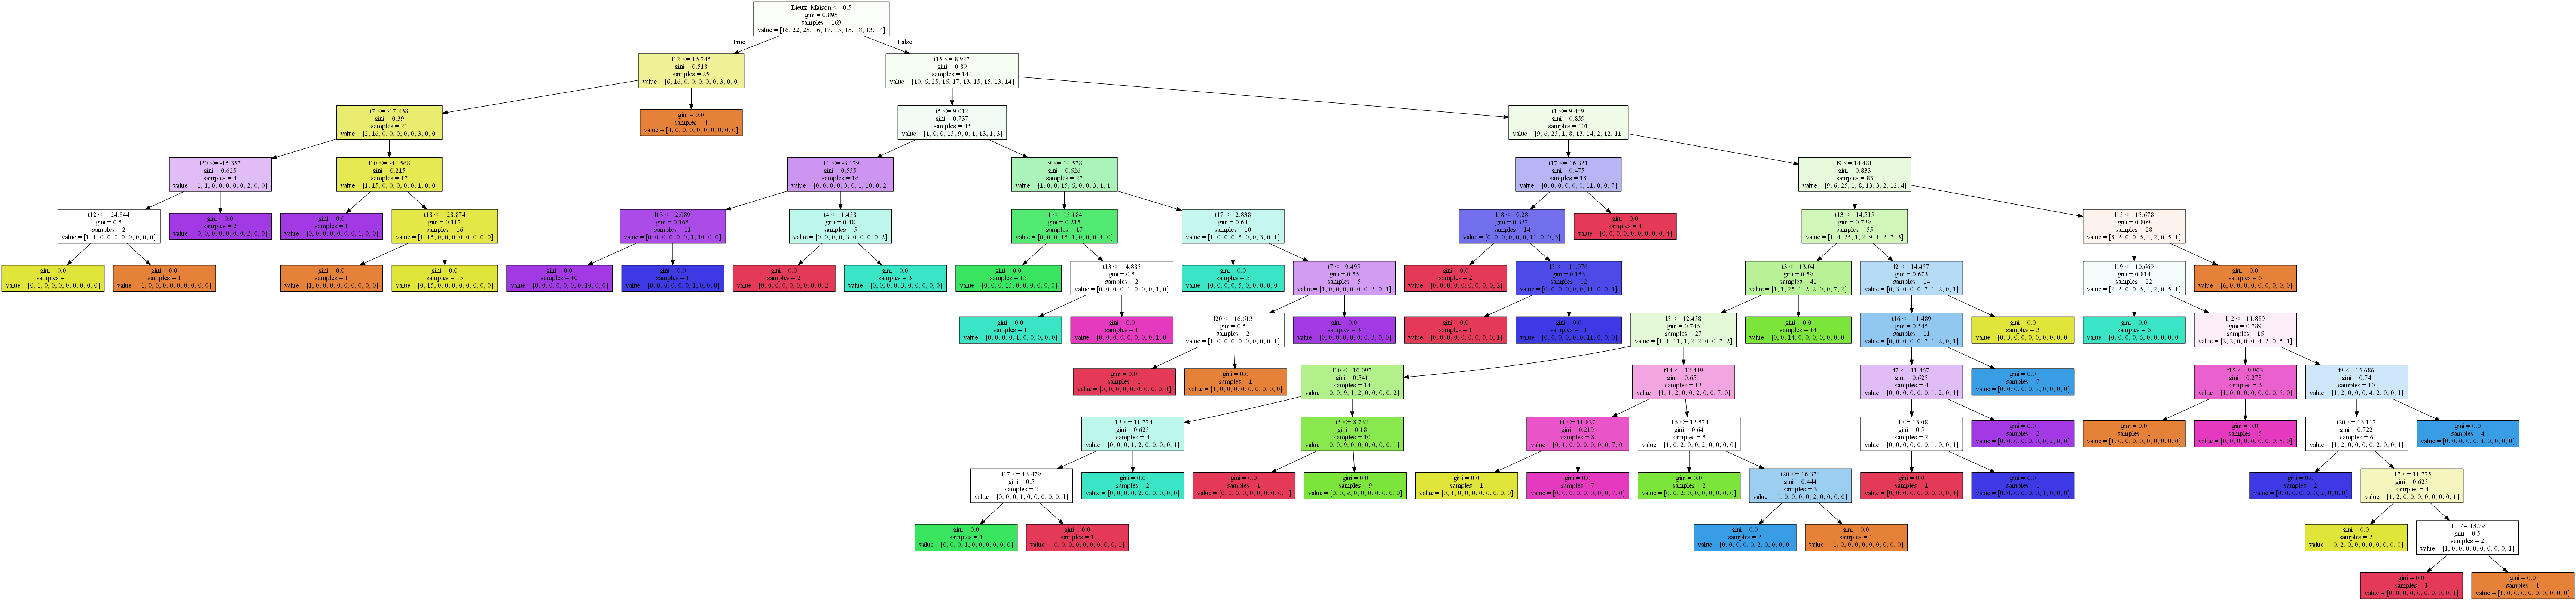

In [11]:
# Install Graphviz + set system path to dot
# pip install export_graphviz

with open("tree.dot", 'w') as f:
        export_graphviz(clf, out_file=f,
                        feature_names=source.columns,
                        filled=True)
        
!dot -Tpng tree.dot -o tree.png 
display(Image('tree.png'))



## Analyse avec dataset analysé

In [12]:
# récupération des variables qui ont été stockées dans le noteBook "Pré-traitement" (DATASET ANALYSE)
%store -r activity_dataset_analysed
%store -r colonnes_source_analysed
%store -r colonnes_cible_analysed
%store -r source_analysed
%store -r cible_analysed

In [13]:
x_analysed_train, x_analysed_test, y_analysed_train, y_analysed_test = train_test_split(source_analysed, cible_analysed, test_size=0.7)

display(x_analysed_train, y_analysed_train, x_analysed_test, y_analysed_test)

,t1,t2,t3,t4,t5,t6,t7,t8,t9,t10,...,t18,t19,t20,Lieux_Ecole,Lieux_Exterieur,Lieux_Maison,moyenne_t,max_t,min_t,ecart_type_t
201,13.424179,14.185516,11.693146,12.306076,13.191910,13.337982,12.696320,13.329590,13.590561,11.830826,...,11.320862,12.394653,13.968857,0,0,1,13.156970,14.842712,11.320862,1.037325
120,70.394196,-13.586029,-34.370102,0.725311,65.786545,-1.254684,16.078140,83.933411,-12.157883,-31.164246,...,-8.682693,64.578674,9.747864,0,1,0,17.609167,95.673370,-34.370102,41.603248
519,15.896179,14.779282,13.630066,12.695129,13.372681,15.466415,14.470444,9.764633,11.071854,12.013977,...,14.609299,12.768143,10.955734,0,0,1,13.416442,16.182297,9.764633,1.775411
148,-29.600845,-44.326370,-36.766693,-8.521088,-17.318588,-50.325043,-81.311996,-35.060806,-8.189484,-5.597778,...,-4.310867,-8.011124,-22.560699,0,0,1,-27.768376,-3.470520,-81.311996,21.852574
521,11.369934,13.243408,12.941727,13.073410,12.775345,12.921387,12.757385,13.102142,12.930954,12.696335,...,13.148819,13.561813,12.588593,0,0,1,12.956635,13.916153,11.369934,0.523291
307,13.087784,15.686676,13.509171,14.172348,14.671539,14.225021,18.122772,23.842545,21.617126,7.626587,...,25.486160,5.972198,11.476486,0,0,1,14.345270,25.486160,5.972198,5.303038
346,14.007156,14.389023,14.240585,14.229828,14.235809,14.331573,14.181915,14.296844,14.247772,14.304031,...,14.226227,14.248962,14.289673,0,0,1,14.254952,14.389023,14.007156,0.072890
200,13.932938,12.239029,11.816452,12.150436,11.662033,11.939758,14.967224,11.374741,10.219528,12.114548,...,13.354721,13.451706,13.515137,0,0,1,13.280751,17.768448,10.219528,1.926504
33,8.772232,8.736328,12.770538,5.212067,5.158173,9.477325,5.787857,6.106293,10.323685,11.606964,...,19.262421,10.923416,8.761459,0,0,1,12.720330,35.094070,5.158173,7.406605
221,12.072632,10.578659,12.401840,12.650848,14.665558,12.327621,15.248550,13.033920,13.822800,10.618164,...,11.693161,12.017563,12.166016,0,0,1,12.148834,15.248550,9.496490,1.371617


,Action
201,S'assoir (chaise)
120,Courrir
519,Marcher
148,Sauter
521,Ne rien faire
307,Courrir
346,Ne rien faire
200,S'assoir (chaise)
33,Se lever (depuis position allongée)
221,Se lever (chaise)


,t1,t2,t3,t4,t5,t6,t7,t8,t9,t10,...,t18,t19,t20,Lieux_Ecole,Lieux_Exterieur,Lieux_Maison,moyenne_t,max_t,min_t,ecart_type_t
177,10.667236,11.923004,11.775772,13.558243,18.308319,13.547455,16.167923,14.263321,13.774918,12.365936,...,13.199112,12.953705,12.855530,0,0,1,13.138954,18.308319,10.667236,1.662337
26,10.773773,10.628937,9.954956,10.514023,8.261063,8.823715,10.968903,15.143204,9.783768,28.653687,...,7.263885,9.898712,8.846436,0,0,1,10.164039,28.653687,4.608719,5.122700
385,-3.466934,-3.106598,-3.477707,-4.076263,-7.109695,-7.182739,-3.731491,8.310150,11.721878,12.266571,...,12.319229,7.976166,7.142975,0,0,1,6.667067,22.079208,-7.182739,9.170334
556,10.669617,10.239868,14.318405,10.263809,6.898773,8.337677,10.298538,10.434998,12.106155,15.198273,...,11.379517,10.577469,9.878342,0,0,1,11.862425,19.936401,6.898773,3.037253
479,12.850754,12.940536,11.608154,9.600632,7.207611,5.625046,7.376404,17.232147,25.456223,22.401230,...,13.088974,7.911514,8.913498,0,0,1,11.454813,25.456223,-0.696838,6.442434
128,-0.404739,-2.317719,30.974854,20.528961,-11.048172,5.379639,33.032669,-21.866379,-36.266296,41.093964,...,23.232010,8.865601,27.310547,0,1,0,10.978423,53.263672,-36.266296,26.658075
446,-10.588486,-11.136765,-11.152313,-10.856628,-11.537781,-11.967545,-13.441177,-10.220978,-7.074982,-4.995621,...,16.512695,16.392960,13.818008,0,0,1,-1.084997,16.512695,-13.441177,10.907640
161,16.194260,10.182404,6.956223,9.376770,11.436966,12.905823,18.411285,17.227356,11.583023,6.227188,...,9.494080,12.261780,11.622528,1,0,0,11.719490,18.869781,6.227188,4.153905
94,11.164047,11.142487,14.529083,18.888931,10.638519,7.684052,4.819397,0.630737,-18.708405,-35.325378,...,-8.749741,-7.906967,-20.483719,0,1,0,-5.944151,18.888931,-35.325378,14.918701
337,14.197495,14.266922,14.247757,14.318405,14.231003,14.289673,14.234604,14.268127,14.229813,14.199890,...,14.259735,14.262131,14.274109,0,0,1,14.261477,14.380646,14.195084,0.043507


,Action
177,S'assoir (chaise)
26,S'allonger (depuis position debout)
385,Se lever (depuis position allongée)
556,S'assoir (depuis position allongée)
479,S'allonger (depuis position debout)
128,Courrir
446,Se lever (depuis position allongée)
161,Marcher
94,Marcher
337,Ne rien faire


In [14]:
# DecisionTreeClassifier

clf = DecisionTreeClassifier().fit(x_analysed_train, y_analysed_train)

predict = clf.predict(x_analysed_test)

### Report

In [15]:
print(metrics.classification_report(y_analysed_test,predict))

                                     precision    recall  f1-score   support

                            Courrir       0.71      0.54      0.62        46
                            Marcher       0.43      0.63      0.51        35
                      Ne rien faire       0.88      0.79      0.83        38
S'allonger (depuis position assise)       0.60      0.62      0.61        48
S'allonger (depuis position debout)       0.43      0.49      0.46        37
                  S'assoir (chaise)       0.31      0.30      0.30        37
S'assoir (depuis position allongée)       0.56      0.67      0.61        46
                             Sauter       0.61      0.34      0.44        41
                  Se lever (chaise)       0.44      0.44      0.44        34
Se lever (depuis position allongée)       0.53      0.56      0.54        34

                        avg / total       0.56      0.54      0.54       396



### Accuracy

In [16]:
res=[]

for i in range(100):
    x_analysed_train, x_analysed_test, y_analysed_train, y_analysed_test = train_test_split(source_analysed, cible_analysed, test_size=.4)
    clf = DecisionTreeClassifier().fit(x_analysed_train, y_analysed_train)
    y_predict = clf.predict(x_analysed_test)
    res.append(accuracy_score(y_analysed_test, y_predict))

print('Average : ',np.average(res))

Average :  0.668053097345


### Graphe

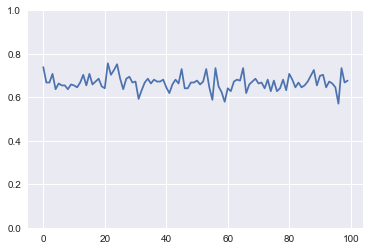

In [17]:
%matplotlib inline

plt.ylim([0,1])
plt.plot(res);

## Analyse avec dataset sans les données brut (sans X, Y et Z)

In [18]:
# récupération des variables qui ont été stockées dans le noteBook "Pré-traitement"
%store -r colonnes_source_analysed_2
%store -r colonnes_cible_analysed_2
%store -r source_analysed_2
%store -r cible_analysed_2

In [19]:

x_analysed_2_train, x_analysed_2_test, y_analysed_2_train, y_analysed_2_test = train_test_split(source_analysed_2, cible_analysed_2, test_size=0.7)

display(x_analysed_2_train, y_analysed_2_train, x_analysed_2_test, y_analysed_2_test)

,Lieux_Ecole,Lieux_Exterieur,Lieux_Maison,moyenne_t,max_t,min_t,ecart_type_t
549,0,0,1,-2.387145,12.051086,-11.616791,8.293947
139,0,0,1,-19.806759,13.268539,-75.111023,24.692523
333,0,0,1,13.919760,14.106506,13.660004,0.110321
28,0,0,1,0.591481,16.919693,-18.076355,11.952539
509,0,0,1,12.464808,55.412491,-4.137299,16.021727
13,0,0,1,14.196773,20.105179,10.304520,2.420122
165,1,0,0,13.350662,17.663086,9.653290,1.842539
350,0,0,1,12.430450,13.864700,11.809280,0.391753
447,0,0,1,13.854161,17.882156,9.752670,2.181770
203,0,0,1,12.935387,14.676346,11.712311,0.905637


,Action
549,S'assoir (depuis position allongée)
139,Sauter
333,Ne rien faire
28,S'allonger (depuis position debout)
509,Sauter
13,Se lever (chaise)
165,Marcher
350,Ne rien faire
447,S'assoir (chaise)
203,S'assoir (chaise)


,Lieux_Ecole,Lieux_Exterieur,Lieux_Maison,moyenne_t,max_t,min_t,ecart_type_t
376,0,0,1,1.450525,16.221802,-12.271591,9.719990
559,0,0,1,4.478288,13.385864,-8.480392,7.394686
474,0,0,1,3.166801,16.407333,-25.316422,13.640110
377,0,0,1,0.444539,16.409729,-14.058884,10.812105
186,0,0,1,12.712548,18.267639,6.763504,2.254441
388,0,0,1,6.620801,19.646698,-15.536102,11.458018
38,0,0,1,12.623364,24.408752,5.168961,6.272312
189,0,0,1,12.513526,18.498672,9.836456,2.016431
317,0,0,1,14.443314,27.995270,-2.751068,6.650622
345,0,0,1,14.284638,14.371063,14.207062,0.040584


,Action
376,Se lever (depuis position allongée)
559,S'assoir (depuis position allongée)
474,S'allonger (depuis position debout)
377,Se lever (depuis position allongée)
186,S'assoir (chaise)
388,Se lever (depuis position allongée)
38,Se lever (depuis position allongée)
189,S'assoir (chaise)
317,Courrir
345,Ne rien faire


In [20]:
# DecisionTreeClassifier

clf = DecisionTreeClassifier().fit(x_analysed_2_train, y_analysed_2_train)

predict = clf.predict(x_analysed_2_test)

### Report

In [21]:
print(metrics.classification_report(y_analysed_2_test,predict))

                                     precision    recall  f1-score   support

                            Courrir       0.86      0.72      0.78        43
                            Marcher       0.60      0.62      0.61        39
                      Ne rien faire       0.97      1.00      0.99        39
S'allonger (depuis position assise)       0.50      0.68      0.58        41
S'allonger (depuis position debout)       0.49      0.57      0.53        40
                  S'assoir (chaise)       0.25      0.19      0.22        37
S'assoir (depuis position allongée)       0.51      0.37      0.43        49
                             Sauter       0.74      0.86      0.80        37
                  Se lever (chaise)       0.33      0.44      0.38        32
Se lever (depuis position allongée)       0.38      0.28      0.32        39

                        avg / total       0.57      0.57      0.57       396



### Accuracy

In [22]:
res=[]

for i in range(100):
    x_analysed_2_train, x_analysed_2_test, y_analysed_2_train, y_analysed_2_test = train_test_split(source_analysed_2, cible_analysed_2, test_size=0.7)
    clf = DecisionTreeClassifier().fit(x_analysed_2_train, y_analysed_2_train)
    y_predict = clf.predict(x_analysed_2_test)
    res.append(accuracy_score(y_analysed_2_test, y_predict))

print('Average : ',np.average(res))

Average :  0.565277777778


### Graphe

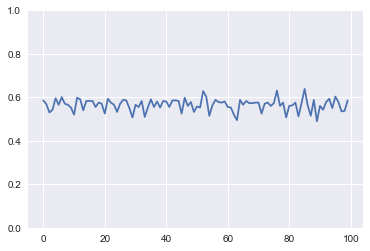

In [23]:
%matplotlib inline

plt.ylim([0,1])
plt.plot(res);